# 시그모이드 함수 훑어보기

In [2]:
# 필요한 패키지 임포트 

import matplotlib.pyplot as plt
import numpy as np
import math

### (1) Sigmoid function, Logistic Function 구현

로지스틱함수는 무한대의 실수값을 0부터 1사이의 실수값을 1대1 대응시키는 시그모이드 함수이다.

In [3]:
def sigmoid(x):
    a = []
    for item in x:
        a.append(1 / (1+math.exp(-item)))
    return a

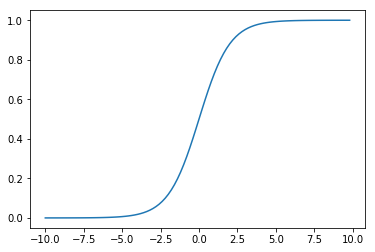

In [4]:
x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)
plt.plot(x, sig)
plt.show()

### (2) Odds 구현

Odds란 승산으로 임의의 사건 A가 발생하지 않을 확률 대비 일어날 확률의 비율을 뜻하는 개념이다. 승산이 커질수록 사건 A가 발생할 확률이 커진다. P값이 1에 가까워 질수록 Odds 값이 무한대로 증가한다. 반대로 P값이 0에 가까워질수록 Odds값은 0에 가까워진다.

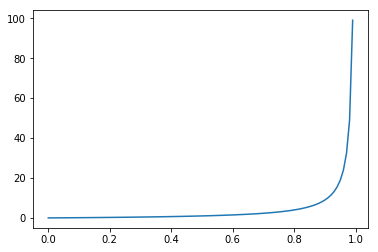

In [5]:
p = np.arange(0., 1., 0.01)
odds = p/(1-p)
plt.plot(p, odds)
plt.show()

### (3) 로지트함수(Logit function)

산비를 로그 변환한 것(-무한부터 무한까지의 값 가질 수 있음)이다. 로지스틱 함수는 이 함수의 역함수를 의미한다. P값이 1에 가까워 질수록 로지트함수값이 무한대에 가까워지고, P값이 0에 가까워 질수록 로지트함수값이 마이너스 무한대에 가까워진다. 로그의 성질에 따라 a-logx는 a/logx와 같은데, 아래에서 -log(1-x)를 보면 로지트 함수에서 분모의 변화를 볼 수 있다. x가 커질수록 -log(1-x)는 무한대에 가까워지고, 작아질수록 0에 가까워진다. 

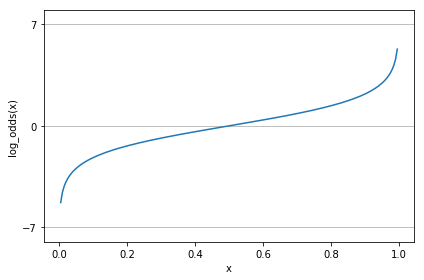

In [6]:
def log_odds(p):
    return np.log(p/(1 - p))

x = np.arange(0.005, 1, 0.005)
log_odds_x = log_odds(x)
plt.plot(x, log_odds_x)
plt.ylim(-8, 8)
plt.xlabel('x')
plt.ylabel('log_odds(x)')

# y axis ticks and gridline
plt.yticks([-7, 0, 7])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

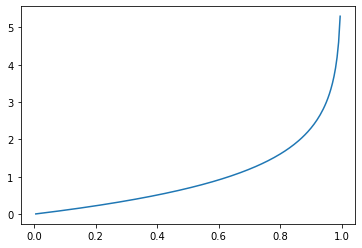

In [20]:
x = np.arange(0.005, 1, 0.005)
y = -np.log(1-x)
plt.plot(x,y)
plt.show()

### (4) 왜 로지스틱 회귀에서 로지트 함수를 사용할까?
a.k.a. 로지트 함수에 역산을 하면 어떻게 될까?

로지스틱 회귀의 목적은 '분류'로, 결과가 범주형일 경우 사용한다. 생김새는 일반적인 선형 회귀의 특수한 경우로 볼 수 있으나, 종속 변수 y의 결과가 0과 1의 범위에 있어야 한다. 결과 확률을 확인하는 것이 목적이기 때문이다. 그러나 x의 선형모델인 a + bx 형태로 확률인 y를 표현해야하는 상황에서 바로 모델을 적용할 경우 x의 범위는 -inf ~ inf이므로 계산된 결과 값인 y 역시 -inf ~ inf가 된다. 이와 같은 결과는 예측의 정확도를 떨어뜨린다. 

이 문제를 해결하기 위해 로지스틱 회귀는 연속이고 증가함수이며 [0,1]에서 값을 갖는 연결 함수 g(x)를 사용한다. 연결 함수의 종류는 다양하지만 대표적 모형이 로지스틱 모형으로, 계산이 편리하여 많이 사용된다. 로지스틱 모형의 식은 독립 변수가 -inf ~ inf의 어느 수든 관계 없이 종속 변수(결과값)가 항상 0과 1 사이에 있게 한다. 이 식은 odds를 로지트(logit) 변환하여 얻을 수 있다.

로지트 함수는 0부터 1까지의 값을 -inf 부터 inf의 값으로 변환하는데, 이에 역함수를 취하면 -inf 부터 inf의 값을 0과 1 사이의 값으로 조정할 수 있다. 따라서 로지트 함수의 역함수를 로지스틱 회귀에서 사용하면 적절하게 되고, 이 로지트 함수의 역함수를 로지스틱 함수라고 부른다.

### (5) 입력값이 주어졌을 때 로지스틱 함수로 분류하는 과정

입력값이 주어지면 입력값에 대해 y=1일 조건부 확률을 각 분류 결과값들에 대하여 계산한다. 이는 로지스틱 회귀 모형에서 베르누이 확률 변수의 모수(parameter) 세타가 독립 변수  x에 의존한다고 가정하기 때문이다. 우선 베르누이 시도에서 1이 나올 확률 세타와 0이 나올 확률  1−세타의 비(ratio)는 odds ratio이다. 이를 로그 변환한 후 역함수를 취해 얻은 결과에 기초하여 분류를 수행한다.

### Reference

- 가천대학교 산업경영공학과 최성철 교수님의 Machine Learning 강의
- https://ko.wikipedia.org/wiki/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80
- https://en.wikipedia.org/wiki/Logit
- https://datascienceschool.net/view-notebook/d0df94cf8dd74e8daec7983531f68dfc/
- https://datascienceschool.net/view-notebook/6595a7c65f5449678e810706efc5c97f/
- https://blog.naver.com/hancury/220551331819